<a href="https://colab.research.google.com/github/cabbi120101/End-to-end/blob/master/%EA%B3%B5%EB%AA%A8%EC%A0%84%EA%B3%B5%EB%B6%80/%EC%8B%9C%EA%B0%81%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5(%EA%B8%B0%EC%82%AC%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and di

In [ ]:
# 한글 글꼴 path
import os
os.listdir("/usr/share/fonts/truetype/nanum/")

['NanumMyeongjo.ttf',
 'NanumSquareB.ttf',
 'NanumBarunGothic.ttf',
 'NanumSquareRoundR.ttf',
 'NanumSquareRoundB.ttf',
 'NanumSquareR.ttf',
 'NanumBarunGothicBold.ttf',
 'NanumGothicBold.ttf',
 'NanumGothic.ttf',
 'NanumMyeongjoBold.ttf']

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd

from tqdm import tqdm_notebook
import re


In [ ]:
data_file = '/content/data/네이버뉴스_대중교통_2021-07-10_10시51분.xlsx'
df = pd.read_excel(data_file)
df.head()

,Unnamed: 0,title,url
0,0,서울 대중교통 감축운행,http://yna.kr/PYH20210709096700013?did=1196m
1,1,'3밀 환경' 대중교통 타기도 불안...직접 타보니 '다닥다닥',https://www.ytn.co.kr/_ln/0103_202107091713166807
2,2,공연장 관객 첫 감염…밤 10시 이후 대중교통 감축,https://news.sbs.co.kr/news/endPage.do?news_id...
3,3,밤 10시 이후 대중교통 운행 감축…“재택하면 좋은데”,http://www.ichannela.com/news/main/news_detail...
4,4,"공연장 관객 첫 감염…서울, 밤 10시 이후 대중교통 감축",https://news.sbs.co.kr/news/endPage.do?news_id...


In [ ]:
df['title'][0]

'서울 대중교통 감축운행'

In [ ]:
df = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", df) # 'ㄱ-ㅎㅏ-ㅣ가-힣 ' 이외의 문자를 다 제거

TypeError: ignored

In [ ]:
# 한글을 제회한 문자들을 제거한 컬럼을 만든다
import re
def leave_all_hangul(ssibal):
    return re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", ssibal)

df['title_clean'] = df['title'].apply(leave_all_hangul)
df.head()

,Unnamed: 0,title,url,title_clean
0,0,서울 대중교통 감축운행,http://yna.kr/PYH20210709096700013?did=1196m,서울 대중교통 감축운행
1,1,'3밀 환경' 대중교통 타기도 불안...직접 타보니 '다닥다닥',https://www.ytn.co.kr/_ln/0103_202107091713166807,밀 환경 대중교통 타기도 불안직접 타보니 다닥다닥
2,2,공연장 관객 첫 감염…밤 10시 이후 대중교통 감축,https://news.sbs.co.kr/news/endPage.do?news_id...,공연장 관객 첫 감염밤 시 이후 대중교통 감축
3,3,밤 10시 이후 대중교통 운행 감축…“재택하면 좋은데”,http://www.ichannela.com/news/main/news_detail...,밤 시 이후 대중교통 운행 감축재택하면 좋은데
4,4,"공연장 관객 첫 감염…서울, 밤 10시 이후 대중교통 감축",https://news.sbs.co.kr/news/endPage.do?news_id...,공연장 관객 첫 감염서울 밤 시 이후 대중교통 감축


In [ ]:
# 한글만 쓰여진 컬럼의 빈도수를 구하는 함수 제작, 데이타프레임으로 저장함 
# 저장하는 중 단어 길이가 1인 단어 제거(명 같은 단위를 없애기 위해)
freq = dict()
for _, word_count in df["title_clean"].iteritems():
    word_split = word_count.split()
    for word in word_split:
        if word not in freq:
            freq[word] = 1
        else:
            freq[word] += 1

freq_df = pd.DataFrame(list(freq.items()), columns=["word", "count"])
freq_df = freq_df.loc[freq_df["word"].apply(lambda x: len(x)!=1), :]
freq_df = freq_df.set_index("word")
freq_df.head()

,count
word,
서울,122
대중교통,1604
감축운행,20
환경,18
타기도,2


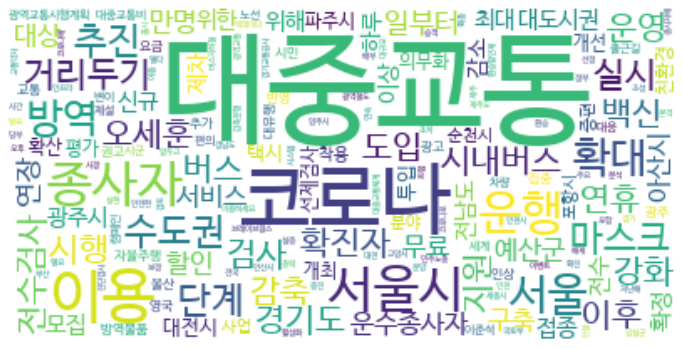

In [ ]:
# wordcloud_image = WordCloud().generate(df['title'].values)
# 워드 클라우드 제작
plt.figure(figsize=(12,8))
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", 
    background_color='white'
)
# title = df['title']
wordcloud_image = wc.generate_from_frequencies(freq_df["count"])

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()